# Natural Language Processing Project
___
**This project is part of the <a href='https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/#instructor-1'>Python for Data Science and Machine Learning Bootcamp </a>**

___

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [3]:
yelp = pd.read_csv('yelp.csv')

**Check the head() method**

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


**Check the info() method**

In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


**Check the describe() method**

In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Add a new column called "text length" taht contains the number of words in the text column.**

In [9]:
yelp['text lenght'] = yelp['text'].apply(len)

In [11]:
#To verify the new column was added
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

**Create a grid of 5 histograms of text length based off of the star ratings.**

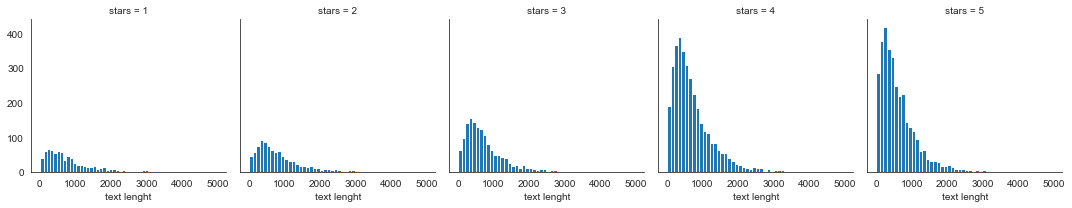

In [99]:
grid = sns.FacetGrid(yelp, col='stars')
grid.map(plt.hist, 'text lenght', bins=50)

We can see that all the stars share a consistent distribution, with more reviews corresponding to higher star ratings.

**Create a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text lenght'>

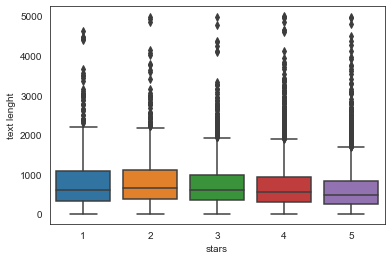

In [25]:
sns.boxplot(data=yelp, x='stars', y='text lenght' )

It seems that stars 1 and 2 have the higher text lenghts.

**Create a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

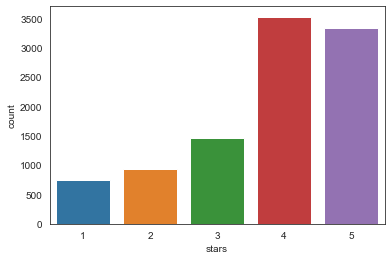

In [26]:
sns.countplot(data=yelp, x='stars')

**Use groupby to get the mean values of the numerical columns**

In [28]:
mean = yelp.groupby('stars').mean()
mean

,cool,useful,funny,text lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on the groupby dataframe to explore the correlations**

In [29]:
mean.corr()

,cool,useful,funny,text lenght
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text lenght,-0.857664,0.699881,0.843461,1.000000


**Create a heatmap based off that .corr() dataframe**

<AxesSubplot:>

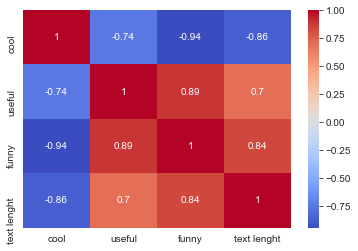

In [35]:
sns.heatmap(mean.corr(), cmap='coolwarm',annot=True)

## NLP Classification Task

**Create a dataframe called yelp_class that contains the columns of yelp dataframe for only the 1 or 5 star reviews.**

In [67]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


**Create the features and target/labels**

In [68]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Use the fit_transform method on the CountVectorizer object and pass in X.**

In [70]:
X = cv.fit_transform(X)

## Train Test Split

**Import train_test_split to split up the data into X_train, X_test, y_train, y_test.**

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

**Import MultinomialNB and create an instance of the estimator**

In [73]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Fit nb using the training data.**

In [74]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

**Use the predict method off of nb to predict labels from X_test.**

In [75]:
preds = nb.predict(X_test)

**Create a confusion matrix and classification report using these predictions and y_test**

In [79]:
#import of metrics
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
#Confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, preds))
print('\n')
print("Classification Report")
print(classification_report(y_test, preds))

Confusion Matrix
[[159  69]
 [ 22 976]]


Classification Report
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Using Text Processing

**Import TfidfTransformer from sklearn.**

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer

**Import Pipeline from sklearn.**

In [88]:
from sklearn.pipeline import Pipeline

**Create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [90]:
pipeline = Pipeline([
    ("Bow:", CountVectorizer()),
    ("Tfidf:", TfidfTransformer()),
    ("Classifier:", MultinomialNB())
])

## Using the Pipeline

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [91]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Fit the pipeline to the training data.**

In [92]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Bow:', CountVectorizer()), ('Tfidf:', TfidfTransformer()),
                ('Classifier:', MultinomialNB())])

### Predictions and Evaluation

**Use the pipeline to predict from the X_test**

In [93]:
predictions = pipeline.predict(X_test)

**Create a classification report and confusion matrix.**

In [98]:
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('\n')
print('Classification Report')
print(classification_report(y_test, predictions))

Confusion Matrix
[[  0 228]
 [  0 998]]


Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\hdgn1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hdgn1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hdgn1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Results interpretation

Our first model did a good job with 90% accuracy in both precision and recall. However, our second model didn't do it that well  with recall at 81% and precision lagging behind at a mere 66%.